In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Pod_Fault_Data_CSV/PF_CPU_Node_VsPod_Frontend.csv')
df.head(10)

CPU_Node_Frontend  CPU_Pod_Frontend
0           0.000267          0.014300
1           0.000279          0.109000
2           0.000738          1.470000
3           0.390000          0.002500
4           1.600000          0.000292
5           1.600000          0.000321
6           1.590000          0.000322
7           1.580000          0.000282
8           0.000320          0.000304
9           0.000245          0.000280

In [2]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['CPU_Node_Frontend','CPU_Pod_Frontend'])

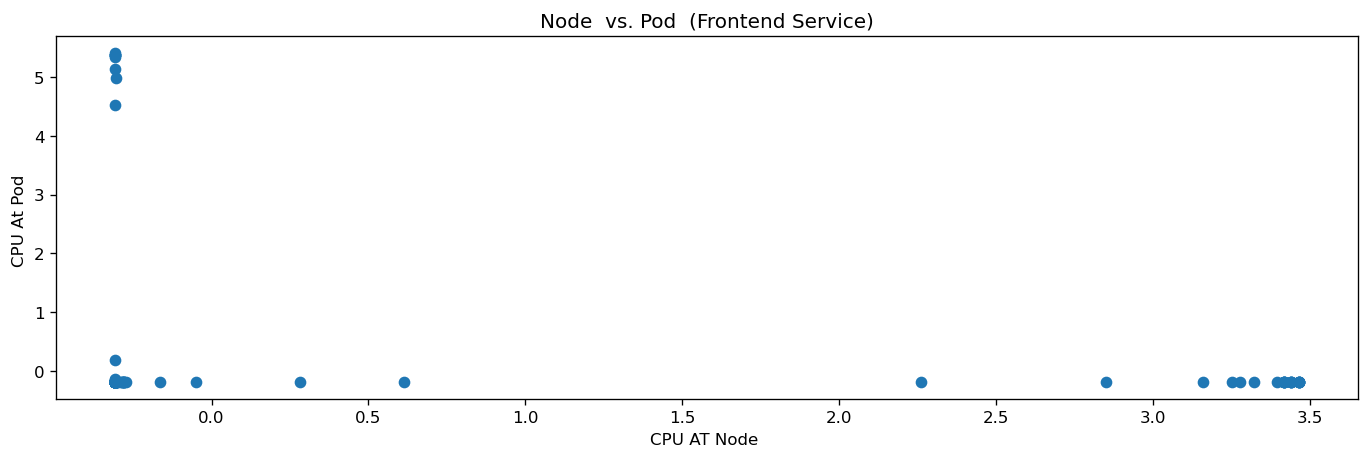

In [3]:
plt.figure(figsize=(14,4))
plt.scatter(df.CPU_Node_Frontend, df.CPU_Pod_Frontend)
plt.xlabel('CPU AT Node ') 
plt.ylabel('CPU At Pod ')
plt.title('Node  vs. Pod  (Frontend Service)')
plt.show()

In [4]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

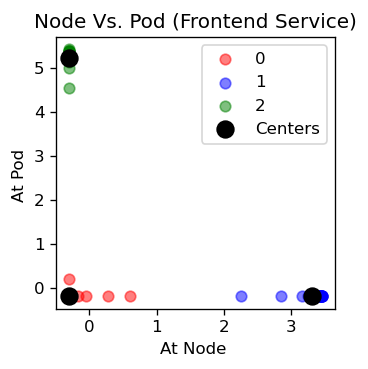

In [6]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Node_Frontend, df[model.labels_==i].CPU_Pod_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Node ")
plt.ylabel("At Pod ")
plt.title('Node Vs. Pod (Frontend Service)')
plt.legend()
plt.show()

In [7]:
def distance_from_center(CPU_Node_Frontend, CPU_Pod_Frontend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Node CPU Usage: the standardized CPU Usage of the data point 
    :param float Pod Cpu Usage: the standardized cpu at Pod of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Node_Front_CPU =  model.cluster_centers_[label,0]
    Pod_CPU_Frontend =  model.cluster_centers_[label,1]
    distance = np.sqrt((CPU_Node_Frontend - Node_Front_CPU) ** 2 + (CPU_Pod_Frontend - Pod_CPU_Frontend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.CPU_Node_Frontend, df.CPU_Pod_Frontend, df.label)

In [8]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     CPU_Node_Frontend  CPU_Pod_Frontend  label  distance
1            -0.307253          0.190732      0      0.38
2            -0.306171          4.995899      2      0.22
3             0.611825         -0.185278      0      0.91
49            0.281663         -0.193088      0      0.58
65            2.262634         -0.193194      1      1.06
68           -0.050857         -0.193183      0      0.25
140          -0.307284          5.419573      2      0.20
165          -0.307296          5.384267      2      0.16
166          -0.307286          4.536919      2      0.68
232           2.852209         -0.193116      1      0.47


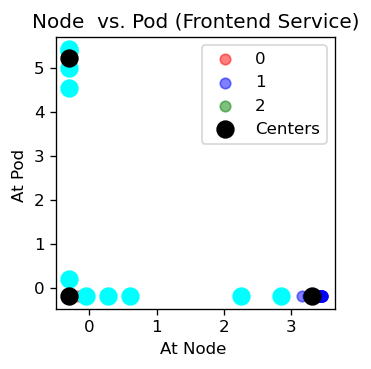

In [10]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Node_Frontend, df[model.labels_==i].CPU_Pod_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.CPU_Node_Frontend, outliers.CPU_Pod_Frontend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Node ")
plt.ylabel("At Pod ")
plt.title('Node  vs. Pod (Frontend Service)')
plt.legend()
plt.show()